In [68]:
import numpy as np 
import pandas as pd

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
Pharma = pd.read_csv('/content/drive/MyDrive/Pharmaceuticals.csv',delimiter=',')
print(Pharma.head())

  Symbol                 Name  Market_Cap  Beta  PE_Ratio   ROE   ROA  \
0    ABT  Abbott Laboratories       68.44  0.32      24.7  26.4  11.8   
1    AGN       Allergan, Inc.        7.58  0.41      82.5  12.9   5.5   
2    AHM         Amersham plc        6.30  0.46      20.7  14.9   7.8   
3    AZN      AstraZeneca PLC       67.63  0.52      21.5  27.4  15.4   
4    AVE              Aventis       47.16  0.32      20.1  21.8   7.5   

   Asset_Turnover  Leverage  Rev_Growth  Net_Profit_Margin  \
0             0.7      0.42        7.54               16.1   
1             0.9      0.60        9.16                5.5   
2             0.9      0.27        7.05               11.2   
3             0.9      0.00       15.00               18.0   
4             0.6      0.34       26.81               12.9   

  Median_Recommendation Location Exchange  
0          Moderate Buy       US     NYSE  
1          Moderate Buy   CANADA     NYSE  
2            Strong Buy       UK     NYSE  
3         Mo

###Use only numerical variables (1 to 9 ) to cluster the 21 firms

In [71]:
columns = Pharma[['Market_Cap', 'Beta', 'PE_Ratio', 'ROE', 'ROA',
       'Asset_Turnover', 'Leverage', 'Rev_Growth', 'Net_Profit_Margin']]
columns

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
0,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1
1,7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5
2,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2
3,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0
4,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9
5,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6
6,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6
7,0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5
8,0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3
9,73.84,0.18,27.9,31.0,13.5,0.6,0.53,6.21,23.4


In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
 
df = scaler.fit_transform(columns.to_numpy())
df = pd.DataFrame(df, columns=['Market_Cap', 'Beta', 'PE_Ratio', 'ROE', 'ROA',
       'Asset_Turnover', 'Leverage', 'Rev_Growth', 'Net_Profit_Margin'])
 
df.head()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
0,0.188642,-0.821041,-0.047867,0.041080,0.247579,-5.247542e-16,-0.217336,-0.540801,0.063205
1,-0.875518,-0.461835,3.583430,-0.875950,-0.965557,9.453132e-01,0.018736,-0.390551,-1.592035
2,-0.897899,-0.262277,-0.299168,-0.740094,-0.522666,9.453132e-01,-0.414062,-0.586247,-0.701953
3,0.174479,-0.022807,-0.248907,0.109009,0.940799,9.453132e-01,-0.768169,0.151089,0.359900
4,-0.183447,-0.821041,-0.336863,-0.271389,-0.580435,-4.726566e-01,-0.322256,1.246425,-0.436490


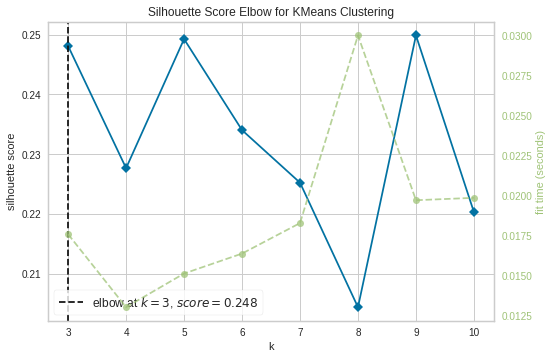

In [73]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(3,11),metric='silhouette', timings= True)
visualizer.fit(df)       
visualizer.show()      

###Fiting the data with 3 clusters

In [74]:
import sklearn.cluster as cluster

In [75]:
K=range(3,11)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [76]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,3,101.415277
1,4,82.718565
2,5,65.472153
3,6,55.014430
4,7,45.907865
5,8,36.459636
6,9,29.353024
7,10,24.492977


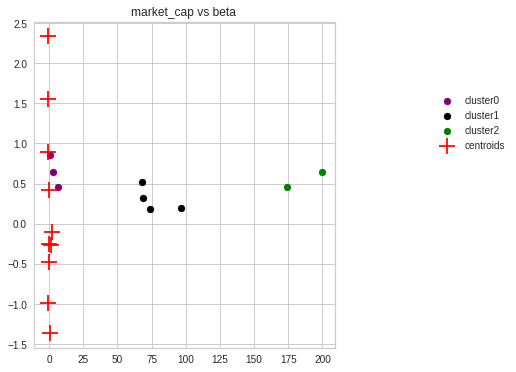

In [77]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[9,6])
ax = plt.subplot(111)
plt.scatter(columns.Market_Cap[y_kmeans==0],columns.Beta[y_kmeans==0],c='purple',label='cluster0')
plt.scatter(columns.Market_Cap[y_kmeans==1],columns.Beta[y_kmeans==1],c='black',label='cluster1')
plt.scatter(columns.Market_Cap[y_kmeans==2],columns.Beta[y_kmeans==2],c='green',label='cluster2')
#plt.scatter(data_for_clustering.Market_Cap[cluster_ids==3],data_for_clustering.Beta[cluster_ids==3],c='pink',label='cluster4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='+',c='red',s=250,label='centroids')
plt.title('market_cap vs beta ')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()


In [78]:
columns[y_kmeans==0].describe()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,3.103333,0.653333,22.200000,20.133333,6.300000,0.700000,1.743333,9.140000,9.900000
std,2.977085,0.195021,3.315117,4.728989,1.802776,0.173205,1.639797,4.213561,2.080865
min,0.410000,0.460000,19.900000,14.900000,4.300000,0.600000,0.270000,6.380000,7.500000
25%,1.505000,0.555000,20.300000,18.150000,5.550000,0.600000,0.860000,6.715000,9.250000
50%,2.600000,0.650000,20.700000,21.400000,6.800000,0.600000,1.450000,7.050000,11.000000
75%,4.450000,0.750000,23.350000,22.750000,7.300000,0.750000,2.480000,10.520000,11.100000
max,6.300000,0.850000,26.000000,24.100000,7.800000,0.900000,3.510000,13.990000,11.200000


In [79]:
columns[y_kmeans==1].describe()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,76.640000,0.302500,23.925000,25.675000,12.975000,0.675000,0.252500,6.515000,19.975000
std,13.621799,0.158403,3.037954,5.546996,1.887459,0.170783,0.261964,7.254215,3.489389
min,67.630000,0.180000,21.500000,17.900000,11.200000,0.500000,0.000000,-2.690000,16.100000
25%,68.237500,0.187500,21.575000,24.275000,11.650000,0.575000,0.045000,3.985000,17.525000
50%,71.140000,0.255000,23.150000,26.900000,12.650000,0.650000,0.240000,6.875000,20.200000
75%,79.542500,0.370000,25.500000,28.300000,13.975000,0.750000,0.447500,9.405000,22.650000
max,96.650000,0.520000,27.900000,31.000000,15.400000,0.900000,0.530000,15.000000,23.400000


In [80]:
columns[y_kmeans==2].describe()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
count,2.000000,2.00000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.00000
mean,186.700000,0.55500,26.000000,37.100000,17.75000,0.850000,0.130000,17.455000,21.55000
std,18.059507,0.13435,3.394113,12.020815,2.05061,0.070711,0.042426,11.433917,5.16188
min,173.930000,0.46000,23.600000,28.600000,16.30000,0.800000,0.100000,9.370000,17.90000
25%,180.315000,0.50750,24.800000,32.850000,17.02500,0.825000,0.115000,13.412500,19.72500
50%,186.700000,0.55500,26.000000,37.100000,17.75000,0.850000,0.130000,17.455000,21.55000
75%,193.085000,0.60250,27.200000,41.350000,18.47500,0.875000,0.145000,21.497500,23.37500
max,199.470000,0.65000,28.400000,45.600000,19.20000,0.900000,0.160000,25.540000,25.20000


from the above three tables,

1)Market_cap: mean & std,
in cluster0 it is 3.103 & 2.977 
in cluster1 it is 76.64 & 13.621
in cluster2 it is 186.7 & 18.05  

2) Beta: mean & std,
in cluster0 it is 0.653 & 0.195
in cluster1 it is 0.302 & 0.158
in cluster2 it is 0.555 & 0.134  


3) PE_Ratio: mean & std,
in cluster0 it is 22.20 & 3.315
in cluster1 it is 23.925 & 0.037
in cluster2 it is 26 & 3.394

4)ROE: mean & std,
in cluster0 it is 20.133 & 4.72
in cluster1 it is 25.67 & 5.54
in cluster2 it is 37.10 & 12.02

5)ROA: mean & std
in cluster0 it is 6.30 & 1.802
in cluster1 it is 12.975 & 1.88
in cluster2 it is 17.75 & 2.05


6)Asset_turnover: mean & std,
in cluster0 it is 0.700 & 0.173
in cluster1 it is 0.675 & 0.170
in cluster2 it is 0.850 & 0.070


7)Leverage: mean & std
in cluster0 it is 1.743 & 1.639
in cluster1 it is 0.252 & 0.261
in cluster2 it is 0.130 & 0.042


8)Rev_Growth: mean & std
in cluster0 it is 9.14 & 4.21
in cluster1 it is 6.51 & 7.254
in cluster2 it is 17.45 & 11.433


9)Net_profit_margin: mean & std
in cluster0 it is 9.90 & 2.08
in cluster1 it is 19.97 & 3.48
in cluster2 it is 21.55 & 5.161


In [81]:
Pharma[y_kmeans==0]

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
7,CHTT,"Chattem, Inc",0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5,Moderate Buy,US,NASDAQ
11,IVX,IVAX Corporation,2.60,0.65,19.9,21.4,6.8,0.6,1.45,13.99,11.0,Hold,US,AMEX


According to the above table, the majority of the companies in this cluster are based in the US, and the NYSE is the exchange on which they are listed. Two values make this column's median recommendation. Moderate  buy and hold

In [82]:
Pharma[y_kmeans==1]

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
9,LLY,Eli Lilly and Company,73.84,0.18,27.9,31.0,13.5,0.6,0.53,6.21,23.4,Hold,US,NYSE
15,NVS,Novartis AG,96.65,0.19,21.6,17.9,11.2,0.5,0.06,-2.69,22.4,Hold,SWITZERLAND,NYSE


The table above shows that while there are several locations, such as the US and the UK, the majority is the US. This cluster includes all of the companies listed on the NYSE. There are two median buy and sell recommendations for each, with HOLD as the other recommendation. The median recommendations are to hold for SWITZERLAND.

In [83]:
Pharma[y_kmeans==2]

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
12,JNJ,Johnson & Johnson,173.93,0.46,28.4,28.6,16.3,0.9,0.10,9.37,17.9,Moderate Buy,US,NYSE
16,PFE,Pfizer Inc,199.47,0.65,23.6,45.6,19.2,0.8,0.16,25.54,25.2,Moderate Buy,US,NYSE


The table above shows that, although distributed across different countries, including Canada, the UK, Ireland, and the US, this cluster contains all of the companies that are listed on the NYSE. Two median recommendations for each of a moderate buy and a strong buy are available, with the remaining shares remaining HOLD.


Therefore, If company is listed on the NYSE, there is a great possibility that the median recommendation will be to hold or buy. Since the NYSE usually lists major businesses, the majority of the pharmaceutical companies listed on the exchange are US-based.

Using  all of the variables in the dataset, assign each cluster a suitable name.

Cluster0: High Risk

Cluster1: Medium Risk

Cluster2: Low Risk